In [62]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error


#Regresion Logistica


Proporciona una salida discreta.

Ejemplo:
  Saber si va a llover o no

Regresion Lineal :
Proporciona una salida continua
  

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/MachineLearning/main/Datasets/data.csv")
df.head()

In [ ]:
data = pd.DataFrame(df)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df['Unnamed: 32'] = df['Unnamed: 32'].fillna(0)
df

In [ ]:
df = df.dropna(how='any')
df

In [ ]:
df.info()

Observamos la cantidad de cancer maligno y benigno

In [ ]:
maligno = data.query('diagnosis == "M"').diagnosis.count()
benigno= data.query('diagnosis == "B"').diagnosis.count()
print(f"Maligno{maligno}\n Benigno: {benigno}")

Maligno212
 Benigno: 357


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
values_diagnosis = {'diagnosis':{'M':1,'B':2}}

In [ ]:
df.replace(values_diagnosis,inplace=True)
df

.hist() nos realiza un histograma sobre el dato señalado

In [ ]:
df['radius_mean'].hist()

##Regresion logistica

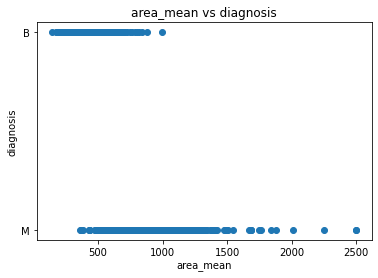

In [ ]:
plt.scatter(x=data['area_mean'],y=data['diagnosis'])
plt.title('area_mean vs diagnosis')
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()

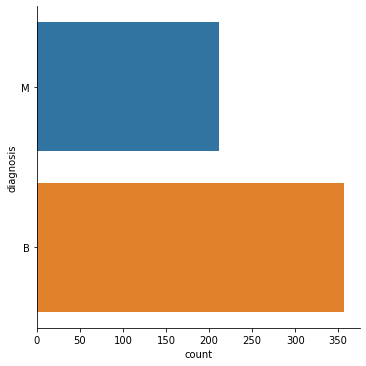

In [ ]:
g = sns.catplot(y="diagnosis",data=data,kind="count")

##Entrenamiento para regresion logistica

In [78]:
#Separamos los datos
x = data.drop(columns='diagnosis')#Borramos la bariable diagnosis del conjunto de datos
y = data['diagnosis']

In [79]:
#Inicializamos los valores para el entrenamiento y para las pruebas
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Indicando que vamos a entrenarlo con regresion logistica

In [80]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Predicciones

In [81]:
y_predict = model.predict(x_test)

In [82]:
model.score(x_test, y_test)

0.6228070175438597

###Matriz de confucion


[[71  0]
 [43  0]]


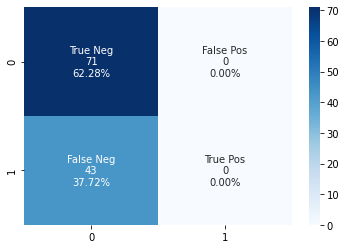

In [83]:
#Métricas para comprobar
from sklearn.metrics import confusion_matrix 
import numpy as np
cm=confusion_matrix(y_test,y_predict)
print(cm)
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


In [84]:
print("Puntuacion entrenamiento: ", model.score(x_train,y_train)*100)
print("Exactitud: ", accuracy_score(y_test,y_predict)*100)

Puntuacion entrenamiento:  62.857142857142854
Exactitud:  62.28070175438597


#Arboles de decision

##Entrenamiento arboles de decision

In [85]:
from sklearn.tree import DecisionTreeClassifier
data_tree = DecisionTreeClassifier()
data_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##Predicciones

In [87]:
y_pred = data_tree.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Puntaje del entrenamiento: ", data_tree.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[68  3]
 [ 3 40]]
Puntaje del entrenamiento:  100.0


##Matriz de confucion

[[68  3]
 [ 3 40]]


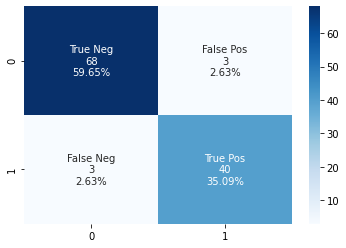

In [89]:
#Métricas para comprobar
from sklearn.metrics import confusion_matrix 
import numpy as np
cm=confusion_matrix(y_test,y_pred)
print(cm)
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
